https://github.com/alura-cursos/data-science-regressao-linear/tree/main/dados

# <strong><font color="77A316">Data Science: transformando variáveis para uma Regressão Linear</font></strong>


---

# **Aula 1 - Análises preliminares**

## **Precificação de imóveis**


**Problema de negócio:**

Você, como **cientista de dados** de uma imobiliária, precisa criar um modelo que consiga estimar os preços de diferentes casas para que o time de vendedores e vendedoras possam negociá-las com potenciais clientes.

Para isso, vamos observar as principais características de casas que já foram vendidas de acordo com a base de dados que recebemos, analisar estes dados e construir um modelo de aprendizado de máquina (ML), averiguando sua eficácia.

<img src="https://raw.githubusercontent.com/afonsosr2/data-science-regressao-linear/main/imagens/casas.webp" alt="Desenho de um conjunto de casas de estilo moderno. Temos casas de 1 a 2 andares" width=720>

**Objetivo**

Estimar preços dos imóveis de acordo com diversas características das propriedades, como área e localização. Para este propósito, vamos:

* Identificar quais fatores contribuem para a precificação dos imóveis;
* Averiguar a influência das características no preço do imóvel;
* Diferenciar quando precisamos transformar ou não as variáveis para uma melhor resposta do modelo;
* Verificar a relação entre as variáveis explicativas e a variável resposta;
* Criar um modelo de regressão linear de múltiplas variáveis;
* Fazer previsões para uma ou mais casas.

**Base de dados:**

Vamos utilizar a base `precos_casa.csv` adaptada de uma base bem conhecida no **Kaggle** chamada [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv).

Esses dados serão lidos a partir do repositório compartilhado pelo GitHub.









## **1.2 - Conhecendo os dados**

---



In [1]:
import pandas as pd
import numpy as np

In [2]:
link = 'https://raw.githubusercontent.com/alura-cursos/data-science-regressao-linear/refs/heads/main/dados/precos_casas.csv'

In [3]:
dados = pd.read_csv(link)

In [4]:
dados.head()

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
0,1042500,79.52,1,23.86,1.639,3.039
1,907500,117.24,0,35.17,1.538,10.910
2,1117500,85.47,1,25.64,1.275,11.791
3,700000,89.28,1,21.07,1.223,10.877
4,1250000,106.37,1,31.91,0.868,11.247


In [5]:
# Verificando a quantidade de dados
dados.shape

(1460, 6)

In [6]:
# Como estão os meus dados? Temos dados nulos? Quais são seus tipos?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor                 1460 non-null   int64  
 1   area_primeiro_andar   1460 non-null   float64
 2   existe_segundo_andar  1460 non-null   int64  
 3   area_quintal          1460 non-null   float64
 4   dist_metro            1460 non-null   float64
 5   dist_parque           1460 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


## **1.3 - Entendendo a relação dos dados**

---



Para entender a relação dos dados entre o valor de venda dos imóveis do dataset e suas características vamos utilizar a **Correlação**.

Correlação é uma medida estatística que varia numa escala de -1 a 1, indicando a relação e a dependência entre duas variáveis. Existem três tipos principais de correlação:

1.   **Correlação Positiva:** quando uma variável aumenta, a outra tende a aumentar.
2.   **Correlação Nula:** não há relação linear entre as variáveis.
3.   **Correlação Negativa:** quando uma variável aumenta, a outra tende a diminuir.

Essa medida não só define a direção, como também, a intensidade da relação.



In [7]:
# Correlação entre todo os dados
corr = dados.corr().round(3)
corr

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
valor,1.000,0.606,0.138,0.614,-0.644,-0.071
area_primeiro_andar,0.606,1.000,-0.339,0.820,-0.369,-0.058
existe_segundo_andar,0.138,-0.339,1.000,-0.301,-0.191,-0.007
area_quintal,0.614,0.820,-0.301,1.000,-0.440,-0.058
dist_metro,-0.644,-0.369,-0.191,-0.440,1.000,0.089
dist_parque,-0.071,-0.058,-0.007,-0.058,0.089,1.000


In [8]:
# Correlação do preço de venda
corr['valor'].to_frame()

,valor
valor,1.000
area_primeiro_andar,0.606
existe_segundo_andar,0.138
area_quintal,0.614
dist_metro,-0.644
dist_parque,-0.071


## **1.4 - Visualizando uma Regressão Linear com uma variável independente**

---



Já compreendemos um pouco a relação entre as variáveis e o valor de venda das casas. Mas que tal observarmos isso visualmente, pegando apenas uma das variáves de nossa base?

> Não se preocupe que aqui vamos apenas observar o comportamento da variável `valor`em relação a `area_primeiro_andar` rodando um modelo de regressão linear dentro da função `reg_plot()` da biblioteca `seaborn`. Mais a frente implementaremos o nosso próprio modelo!

In [9]:
# Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

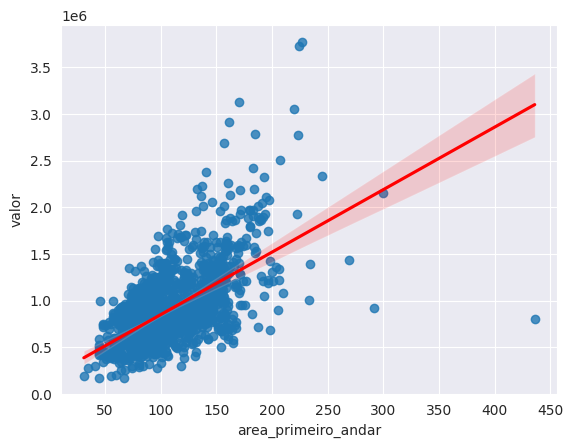

In [10]:
sns.set_style('darkgrid')
sns.regplot(x='area_primeiro_andar',y = 'valor', data = dados, line_kws = {'color':'red'})
plt.show()

Vamos ampliar nossas análises e verificar o comportamento da variável dependente e das variáveis explicativas?

# **Aula 2 - Análises gráficas**

## **2.1 - Visualizando o comportamento da variável dependente**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/boxplot_y_slide.png?raw=true" alt="Boxplot esperado para a variável dependente" width=720>

O **boxplot** é uma representação visual que mostra a distribuição de dados quantitativos, facilitando comparações entre variáveis ou categorias.

Os elementos principais de um boxplot são:

* **Caixa:** Representa o intervalo
interquartil (IIQ), que vai do primeiro quartil (Q1 - 25% dos dados) ao terceiro quartil (Q3 - 75% dos dados).

* **Linha mediana:** Onde está posicionado a mediana (Q2), valor que separa 50% dos dados.

* **Whiskers ("bigodes"):** Extensões que mostram a variabilidade fora do intervalo interquartil, geralmente até 1,5 vezes o IIQ a partir dos quartis.

* **Outliers:** Pontos individuais que estão fora do alcance dos *whiskers*, indicados separadamente.

Essa visualização ajuda a identificar a centralidade, dispersão e possíveis outliers em um conjunto de dados.

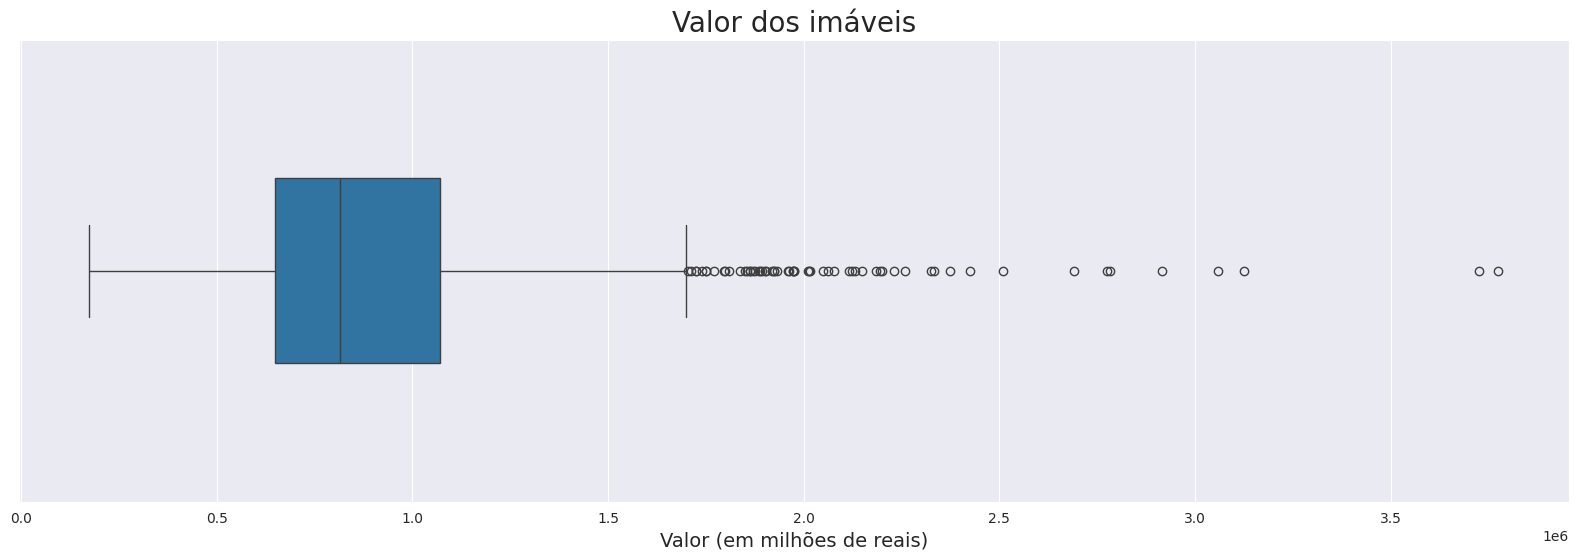

In [11]:
ax = sns.boxplot(x='valor',data=dados, width=0.4)
ax.figure.set_size_inches(20,6)
ax.set_title('Valor dos imáveis', fontsize=20)
ax.set_xlabel('Valor (em milhões de reais)', fontsize=14)
plt.show()

 Esse nosso boxplot está muito para à esquerda. Vamos investigar esse comportamento utilizando outro visual de distribuição dos dados?


## **2.2 - Investigando a distribuição de frequências da variável dependente**

---



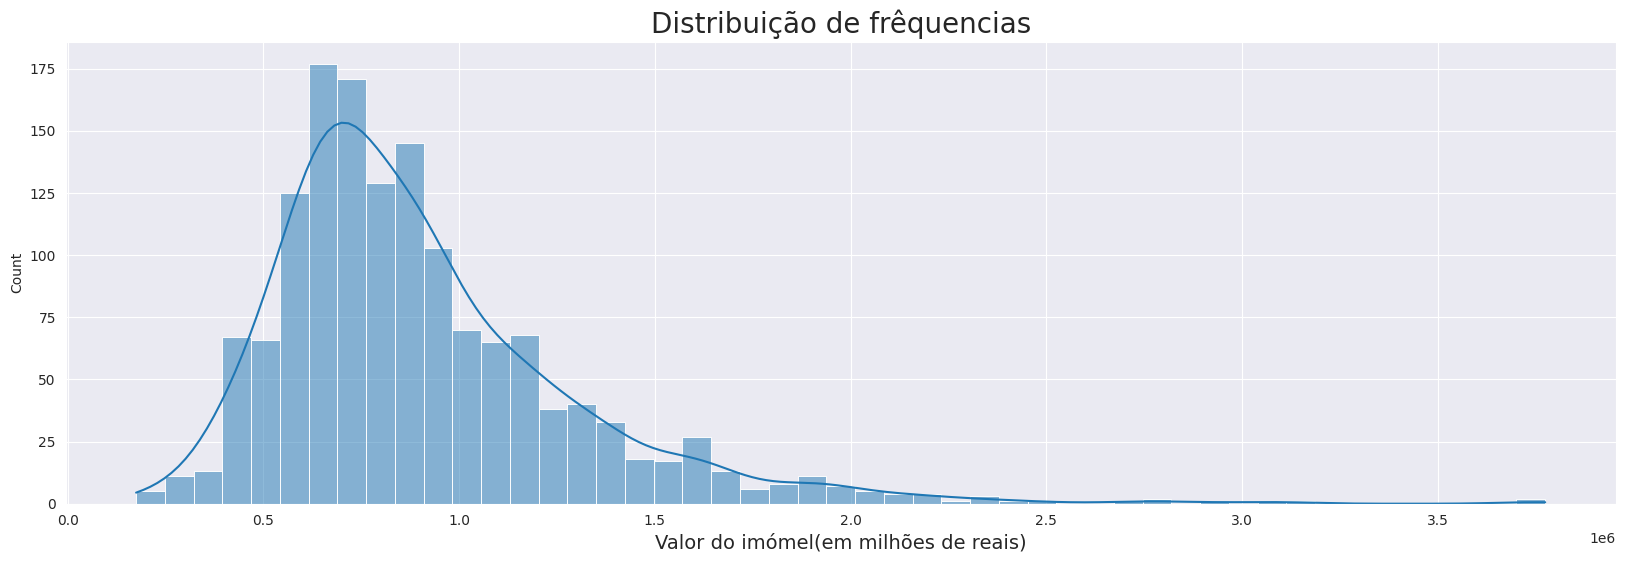

In [12]:
ax = sns.histplot(data=dados, x='valor', kde=True)

ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição de frêquencias', fontsize=20)
ax.set_xlabel('Valor do imómel(em milhões de reais)', fontsize=14)
plt.show()

<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/freq_slide.png?raw=true" alt="Distribuição de frequências para distribuições normais assimétricas à direita, simétrica e assimétrica à esquerda" width=720>

Existem três tipos principais de distribuição de frequências:

1. **Distribuição Assimétrica à Direita (Positivamente Assimétrica)**: a cauda longa está à direita da mediana. Neste caso, a média dos dados é maior que a mediana. **Exemplo:** salários em uma empresa, onde poucas pessoas (com cargos mais gerenciais) têm salários mais altos.

2. **Distribuição Simétrica**: a distribuição é espelhada em torno das medidas de tendência central. A característica principal é que a média, a mediana e a moda são iguais ou muito próximas.

3. **Distribuição Assimétrica à Esquerda (Negativamente Assimétrica)**: a cauda longa está à esquerda da mediana. Neste caso, a média dos dados é menor que a mediana. **Exemplo:** notas de exames onde a maioria dos alunos pontua alto, mas alguns pontuam muito baixo.

Observando graficamente o comportamento da variável dependente (Y → Valor do imóvel) descobrimos que estamos tratando de uma **Distribuição Assimétrica à Direita** e sabemos que vamos precisar realizar uma transformação desses dados antes de aplicarmos o modelo.

Que tal agora observarmos também as variáveis independentes (explicativas) e como elas estão distribuídas em relação ao valor?


## **2.3 - Analisando as variáveis independentes**

---



Vamos agora plotar o relacionamento das variáveis do dataset levando em conta o valor do imóvel utilizando o `pairplot()`

In [13]:
## Colunas dos dados
dados.columns

Index(['valor', 'area_primeiro_andar', 'existe_segundo_andar', 'area_quintal',
       'dist_metro', 'dist_parque'],
      dtype='object')

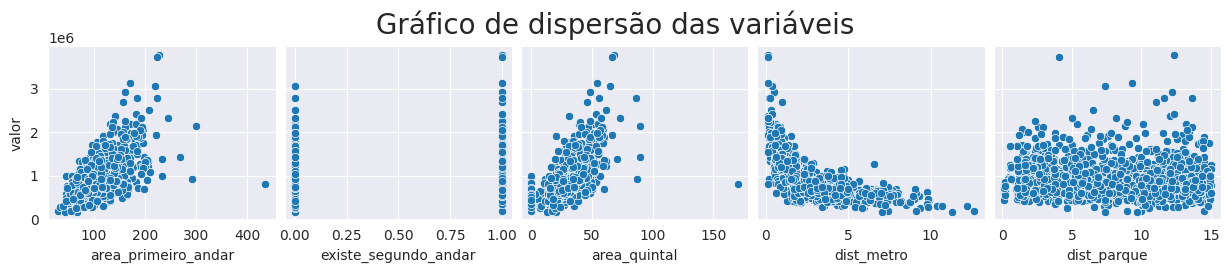

In [14]:
# Pairplot sem reta de regressão
ax = sns.pairplot(data=dados, y_vars='valor',x_vars =['area_primeiro_andar', 'existe_segundo_andar', 'area_quintal',
       'dist_metro', 'dist_parque']  )

ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize = 20, y=1.05)
plt.show()

Para o pairplot com a reta de regressão vamos retirar a coluna da geração do visual `existe_segundo_andar`.

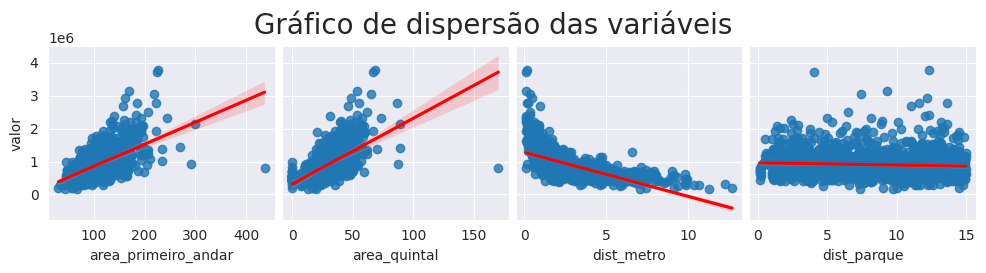

In [15]:
# Pairplot com reta de regressão
ax = sns.pairplot(data=dados, y_vars='valor',x_vars =['area_primeiro_andar',  'area_quintal',
       'dist_metro', 'dist_parque'] ,kind='reg',plot_kws = {'line_kws':{'color':'red'}} )

ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize = 20, y=1.05)
plt.show()

Já vimos coisas interessantes aqui! Vamos partir para a transformação das variáveis? E qual tipo de transformação vamos fazer?

# **Aula 3 - Transformação de variáveis**

## **Curva log**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/curva_log_slide.png?raw=true" alt="Gráfico representando a curva de um logarítmo neperiano (ln(x))" width=720>

A **curva log** é uma representação gráfica de uma função logarítmica, especificamente usando o **logaritmo natural** ($ln$), que tem a base $e$ (aproximadamente igual a 2,718). Ela serve para transformar dados exponenciais em uma escala linear.

A função logarítmica natural é definida como $y = ln(x)$, onde $x > 0$. Essa curva é largamente utilizada para ajustar dados que crescem rapidamente, facilitando a visualização e a interpretação.

Sua característica principal é o crescimento da curva, mas a uma taxa decrescente. Ou seja, temos um achatamento da curva conforme o valor de $x$ aumenta. Isso faz com que grandes valores possam ser descritos numa mesma visualização que pequenos valores (i.e. 1, 10, 100 e 1000).


In [16]:
import numpy as np

In [17]:
np.log(0)

<ipython-input-17-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [18]:
np.log(1)

0.0

In [19]:
np.log(1_000_000)

13.815510557964274

É possível observar que queremos evitar de calcular o log de 0, portanto, vamos precisar de atenção ao analisar os dados antes de efetuar a transformação logarítmica. Vamos transformar nossos dados e observar o que seria um modelo log-log?

## **3.1 - Transformando os dados**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/modelo_log-log_slides.png?raw=true" alt="Apresentando a transformação logarítmica de um modelo log-linear">

### **Aplicando a transformação logarítmica**

* [np.log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
* [np.log1p()](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)

In [20]:



# Verificando se há 0 nas variáveis explicativas do nosso df
dados.describe().round(2)

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,904605.98,108.01,0.43,29.47,2.77,8.15
std,397212.51,35.92,0.50,12.23,1.91,4.20
min,174500.00,31.03,0.00,0.00,0.10,0.12
25%,649875.00,81.94,0.00,22.18,1.42,4.44
50%,815000.00,100.98,0.00,27.64,2.26,8.72
75%,1070000.00,129.25,1.00,36.18,3.89,11.63
max,3775000.00,435.90,1.00,170.29,12.65,15.00


In [21]:
# Transformando as variáveis explicativas e resposta utilizando o logaritmo
dados['log_valor'] = np.log(dados['valor'])
dados['log_area_primeiro_andar'] = np.log(dados['area_primeiro_andar'])
dados['log_area_quintal'] = np.log1p(dados['area_quintal'])
dados['log_dist_metro'] = np.log(dados['dist_metro'])
dados['log_dist_parque'] = np.log(dados['dist_parque'])

In [22]:
# Lendo os dados
dados.head()

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque,log_valor,log_area_primeiro_andar,log_area_quintal,log_dist_metro,log_dist_parque
0,1042500,79.52,1,23.86,1.639,3.039,13.857132,4.376009,3.213260,0.494086,1.111529
1,907500,117.24,0,35.17,1.538,10.910,13.718449,4.764223,3.588230,0.430483,2.389680
2,1117500,85.47,1,25.64,1.275,11.791,13.926605,4.448165,3.282414,0.242946,2.467337
3,700000,89.28,1,21.07,1.223,10.877,13.458836,4.491777,3.094219,0.201307,2.386650
4,1250000,106.37,1,31.91,0.868,11.247,14.038654,4.666924,3.493777,-0.141564,2.420101


Agora que fizemos a transformação dos dados, vamos verificar como ficaram as nossas variáveis graficamente?

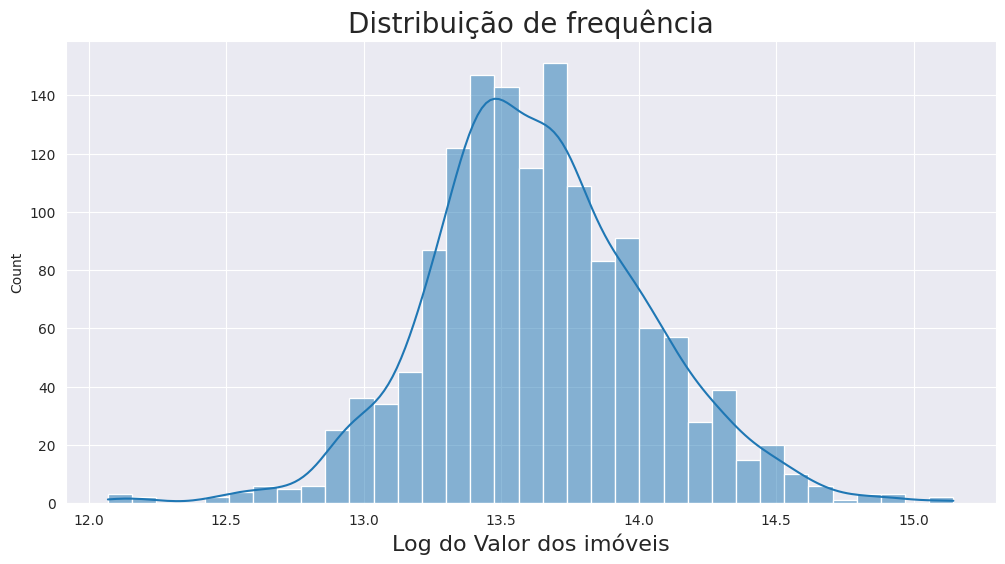

In [23]:
ax = sns.histplot(data=dados, x='log_valor',kde = True )



ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Log do Valor dos imóveis', fontsize=16)
plt.show()

Vamos agora analisar como ficaram também as distribuições de nossas variáveis explicativas separadamente de acordo com o valor do imóvel?

## **3.2 - Verificando a relação linear**

---



Vamos utilizar basicamente o mesmo código, só lembrando de colocar o `log_` em todas que sofreram uma transformação logarítmica

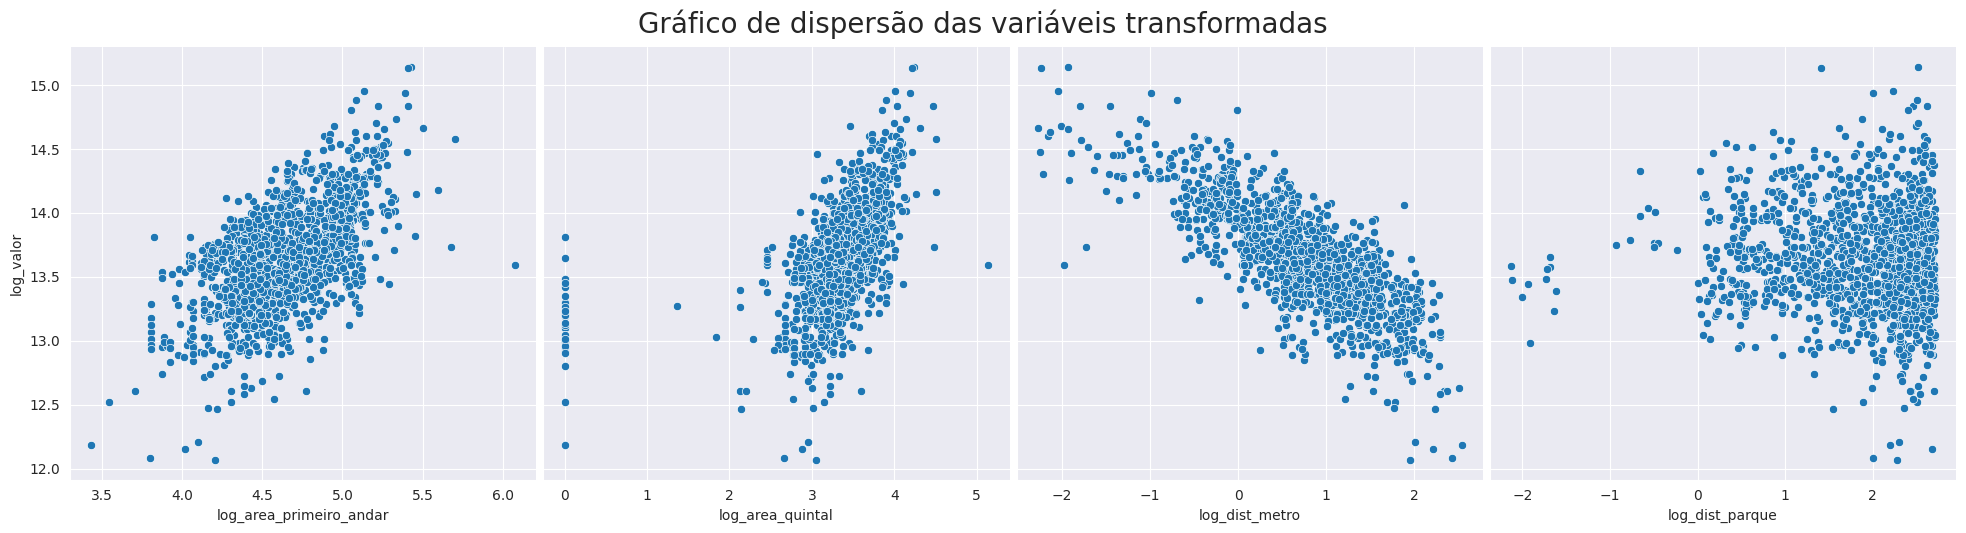

In [24]:
# Pairplot com reta de regressão
ax = sns.pairplot(data=dados, y_vars='log_valor',x_vars =['log_area_primeiro_andar',  'log_area_quintal',
       'log_dist_metro', 'log_dist_parque'] ,height = 5)

ax.figure.suptitle('Gráfico de dispersão das variáveis transformadas', fontsize = 20, y=1.05)
plt.show()

# **Aula 4 - Regressão linear múltipla**

## **4.1 - Preparando os dados**

---



O primeiro passo para criação do nosso modelo de Regressão Linear é a separação dos dados entre datasets de treino e teste.

In [25]:
# Importando o método de separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

In [26]:
# Definindo X e y
y = dados['log_valor']
X = dados[['log_area_primeiro_andar','existe_segundo_andar','log_area_quintal','log_dist_metro','log_dist_parque']]

#### **Vamos compreender o método** `train_test_split`?

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [28]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1991)

In [29]:
X_train

,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro,log_dist_parque
722,4.385396,0,3.222071,2.015969,1.248468
83,4.594514,0,3.423611,1.567782,0.161268
1058,4.653770,1,3.458522,-0.901402,0.953201
976,4.391110,0,2.584752,1.689911,1.673726
748,5.073860,0,3.890595,0.375006,2.591142
...,...,...,...,...,...
519,4.775250,1,3.598955,0.431133,2.296768
397,4.399130,1,3.222071,1.425515,0.215111
1331,4.484470,0,3.272985,1.203273,1.000632
1102,4.657288,0,3.372455,1.310223,1.360977


## **4.2 - Avaliando as estatísticas do modelo com Statsmodels**

---



Agora vamos estimar nosso modelo inicialmente com Statsmodels verificando as estatísticas do modelo para o caso de todas as variáveis adicionadas.

In [30]:
import statsmodels.api as sm

In [31]:
X_train_com_constante = sm.add_constant(X_train)

In [32]:
X_train_com_constante.head()

,const,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro,log_dist_parque
722,1.0,4.385396,0,3.222071,2.015969,1.248468
83,1.0,4.594514,0,3.423611,1.567782,0.161268
1058,1.0,4.653770,1,3.458522,-0.901402,0.953201
976,1.0,4.391110,0,2.584752,1.689911,1.673726
748,1.0,5.073860,0,3.890595,0.375006,2.591142


In [33]:
modelo_statmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     680.5
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.84e-314
Time:                        11:32:02   Log-Likelihood:                 241.21
No. Observations:                 978   AIC:                            -470.4
Df Residuals:                     972   BIC:                            -441.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## **4.3 - Treinando o modelo**

---



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
# Atualizando as variáveis de entrada do modelo
X_train_novo = X_train.drop('log_dist_parque',axis=1)
X_test_novo = X_test.drop('log_dist_parque',axis=1)

In [36]:
# Verificando o X_train_novo
X_train_novo.head()

,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro
722,4.385396,0,3.222071,2.015969
83,4.594514,0,3.423611,1.567782
1058,4.653770,1,3.458522,-0.901402
976,4.391110,0,2.584752,1.689911
748,5.073860,0,3.890595,0.375006


In [37]:
# Instanciando o modelo
modelo = LinearRegression()

In [38]:
# Treinando o modelo com os dados de treino
modelo.fit(X_train_novo, y_train)

LinearRegression()

### **Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino**

O coeficiente de determinação (R²) é uma medida resumida, variando de 0 a 1, que diz quanto a linha de regressão ajusta-se aos dados.

Por exemplo, um R² = 0.8 representa que 80% da variação da variável dependente é explicada pelas variáveis independentes escolhidas no modelo.

#### **R² dos dados de treino**

In [39]:
print(f"R² = {round(modelo.score(X_train_novo, y_train),3)}")

R² = 0.778


#### **Gerando previsões para os dados de teste do modelo**

In [40]:
y_previsto = modelo.predict(X_test_novo)

#### **R² dos dados de previsão**

In [41]:
print(f'R² = {round(metrics.r2_score(y_test, y_previsto),3)}')

R² = 0.699


## **4.4 - Precificando uma casa**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/quanto_custa_slide.png?raw=true" alt="Imagem de uma casa e suas características para precificação" width=720>

In [42]:
# Quais são as features do nosso modelo?
modelo.feature_names_in_

array(['log_area_primeiro_andar', 'existe_segundo_andar',
       'log_area_quintal', 'log_dist_metro'], dtype=object)

In [43]:
# Nova casa
nova_casa = pd.DataFrame({
    'log_area_primeiro_andar':[np.log(150)],
    'existe_segundo_andar':[1],
    'log_area_quintal':[np.log1p(80)],
    'log_dist_metro':[np.log(2)],
})

In [44]:
# Qual o preço dessa casa?
modelo.predict(nova_casa)[0]

14.050816808128781

In [45]:
print(f"R$ {np.exp(modelo.predict(nova_casa)[0]):,.2f}")

R$ 1,265,296.21


Prontinho, conseguimos finalmente precificar a nossa 1ª casa com modelo que criamos. Mas como a área, por exemplo do 1º andar influencia em nosso modelo? E o fato de ter ou não 2º andar?

Vamos entender os coeficientes e consequentemente a contribuição da cada variável no preço?

# **Aula 5 - Entendendo os resultados**

## **5.1 - Obtendo os coeficientes da regressão linear**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/coef_slide.png?raw=true" alt="Imagem com os coeficientes de regressão" width=720>

#### **Intercepto**

O **intercepto** representa o valor médio em $Y$ (Valor do imóvel) tendo todas as variáveis explicativas excluídas do modelo.

No caso do modelo log-log, este coeficiente ($ln\beta_0$) deve ser transformado com o uso da função exponencial (aplicando $e^{ln\beta_0}$) para ser apresentado em reais.

In [46]:
## lendo o valor do intercepto em log
modelo.intercept_

11.036876937417198

In [47]:
## Transformando o efeito do intercepto em reais
np.exp(modelo.intercept_)

62123.33345823829

#### **Coeficientes de regressão**

Os **coeficientes de regressão** $\beta_1$,  $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como **coeficientes parciais de regressão**.

Uma característica peculiar do modelo log-log, que o tornou muito utilizado em modelos de regressão linear, é que seus coeficientes angulares ($\beta_1$, $\beta_3$ e $\beta_4$) medem as elasticidades de $Y$ em relação a $X_1$, $X_3$ e $X_4$, isto é, uma variação percentual de $Y$ corresponde a uma dada variação percentual (pequena) em $X_1$, $X_3$ e $X_4$.

Como você pode notar, o $\beta_2$ não entra nesse caso, pois o coeficiente de uma variável binária/dummy **não dita uma elasticidade**, pois você não pode alterar esse tipo de variável por uma certa porcentagem. Ela vai de 0 a 1 ou de 1 a 0.

In [48]:
# Lendo os coeficientes
modelo.coef_

array([ 0.5272256 ,  0.19584528,  0.08119048, -0.2603026 ])

### **Construindo uma tabela (DataFrame) com os coeficientes e seus valores**

In [49]:
X_train_novo.columns

Index(['log_area_primeiro_andar', 'existe_segundo_andar', 'log_area_quintal',
       'log_dist_metro'],
      dtype='object')

In [50]:
## Criando o índice dos coeficientes
index= ['Intercepto','log_area_primeiro_andar', 'existe_segundo_andar', 'log_area_quintal',
       'log_dist_metro']

In [51]:
## Criando o df
df_params = pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_),index = index, columns = [ 'Parâmetros'])

In [52]:
df_params.round(3)

,Parâmetros
Intercepto,11.037
log_area_primeiro_andar,0.527
existe_segundo_andar,0.196
log_area_quintal,0.081
log_dist_metro,-0.260


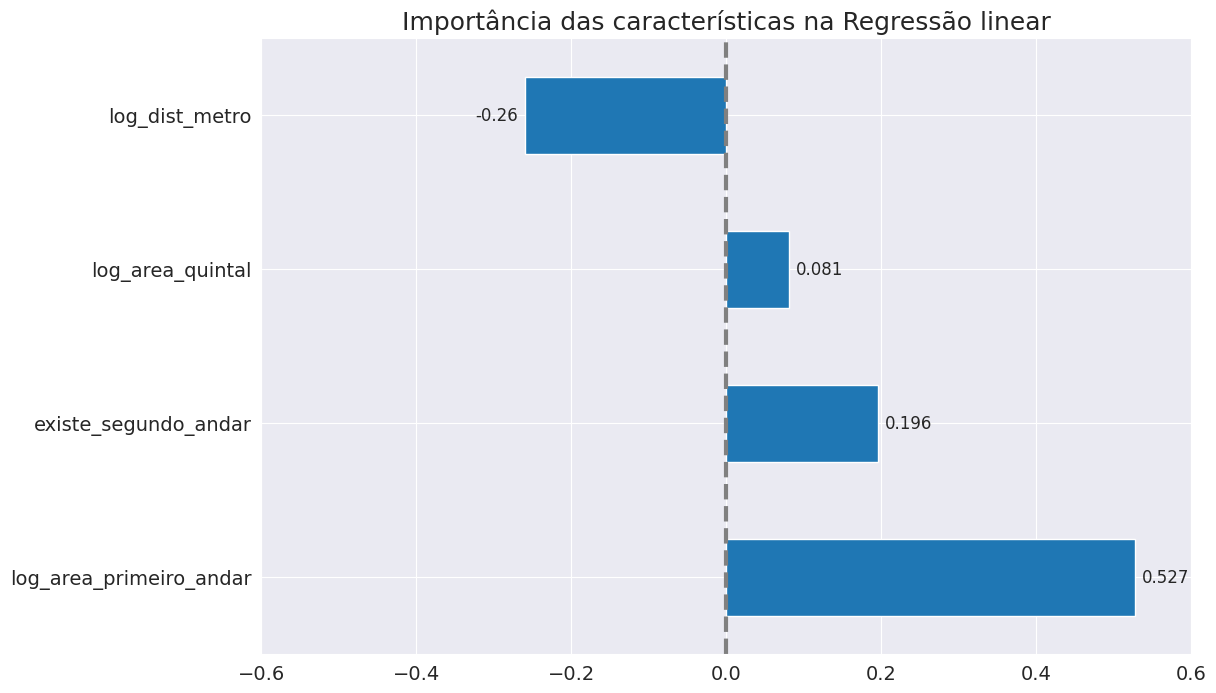

In [64]:
# Criando o plot das importâncias sem o intercepto
ax = df_params[1:].round(3).plot(kind='barh', figsize=(12, 8), legend=False)
ax.bar_label(ax.containers[0], size=12, padding=5)

ax.set_title('Importância das características na Regressão linear', loc='center', size = 18)
ax.axvline(x=0, color="grey", lw=3, linestyle='dashed')
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(-0.6,0.6)
plt.show()


## **5.2 Interpretando os coeficientes estimados**

---



#### **Nosso Modelo:**

<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/modelo_log-log_3.png?raw=true" alt="Nosso modelo construído" width=720>

**Intercepto →** Excluindo o efeito de todas as variáveis explicativas, o efeito médio no Valor do Imóvel seria de **R$ 71.294,33**. (exp[11.175])

**Área do 1º andar (m²)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Área do 1º andar do imóvel gera, em média, um **acréscimo de 0.5%** no Valor do Imóvel.

**Área do Quintal (m²)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Área do Quintal do imóvel gera, em média, um **acréscimo de 0.079%** no Valor do Imóvel.

**Distância até o metrô (km)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Distância até o metrô gera, em média, um **decréscimo de 0.26%** no Valor do Imóvel.



***E a variável `existe_segundo_andar`?***

O impacto de uma variável **binária** ou ***dummy*** sobre o valor do imóvel é calculado de maneira diferente.

Se o valor **varia de 0 para 1** em $X_2$, o impacto, em porcentagem, é calculado da seguinte forma:

$$100 * (e^{\beta_2} - 1)$$

E se o **valor varia de 1 para 0**:
$$100 * (e^{-\beta_2} - 1)$$

Onde, $\beta_2$ é o valor do coeficiente de `existe_segundo_andar`.

In [57]:
# Efeito da dummy
print(f"Efeito da variável existe_segundo_andar: {100 * np.expm1(df_params.loc['existe_segundo_andar'][0]):.2f}%")

Efeito da variável existe_segundo_andar: 21.63%


<ipython-input-57-ce409949d567>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Efeito da variável existe_segundo_andar: {100 * np.expm1(df_params.loc['existe_segundo_andar'][0]):.2f}%")


## **5.3 - Analisando graficamente os resultados do modelo**

---



Vamos agora analisar graficamente os resultados de nosso modelo, gerando previsões de casas para os dados de treino.

### **Analisando pelos dados de TREINO**

#### **Gerando previsões para os dados de treino**

In [58]:
y_train_previsto = modelo.predict(X_train_novo)

#### **Gráfico de dispersão entre o valor estimado e real**

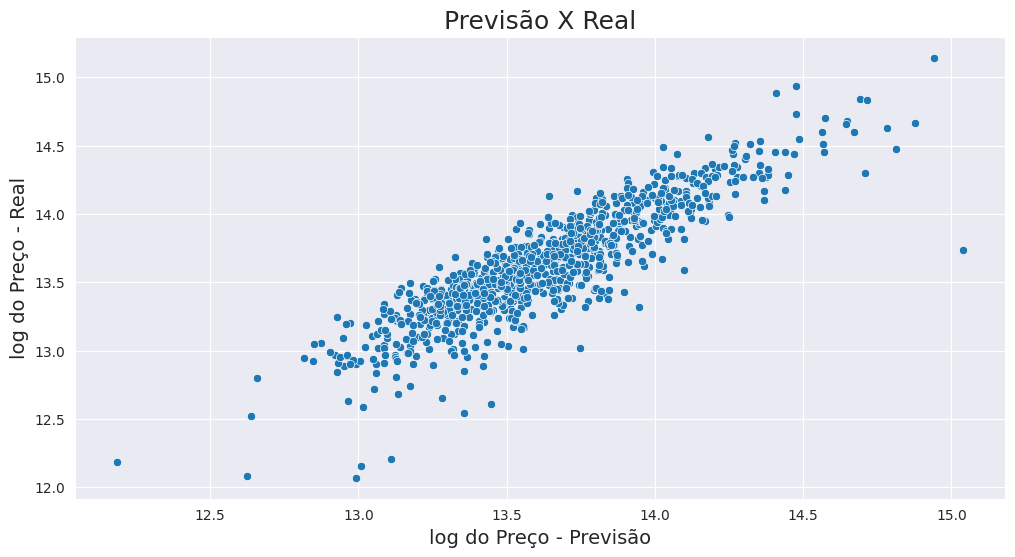

In [60]:
ax = sns.scatterplot(x=y_train_previsto, y = y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
plt.show()

#### **Obtendo os resíduos e observando seu comportamento**

In [61]:
residuo = y_train - y_train_previsto

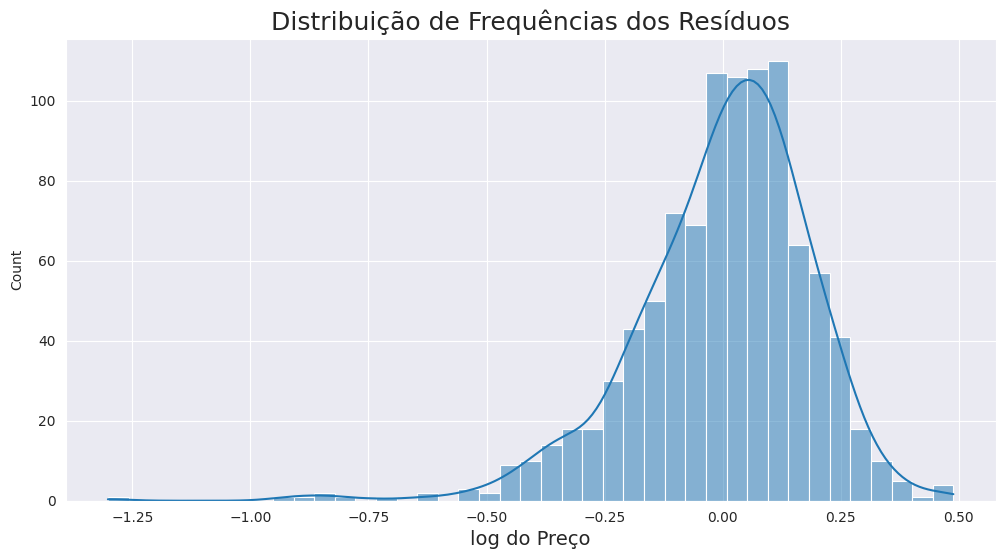

In [62]:
ax = sns.histplot(residuo,kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
plt.show()

##### **Homocedasticidade do modelo**

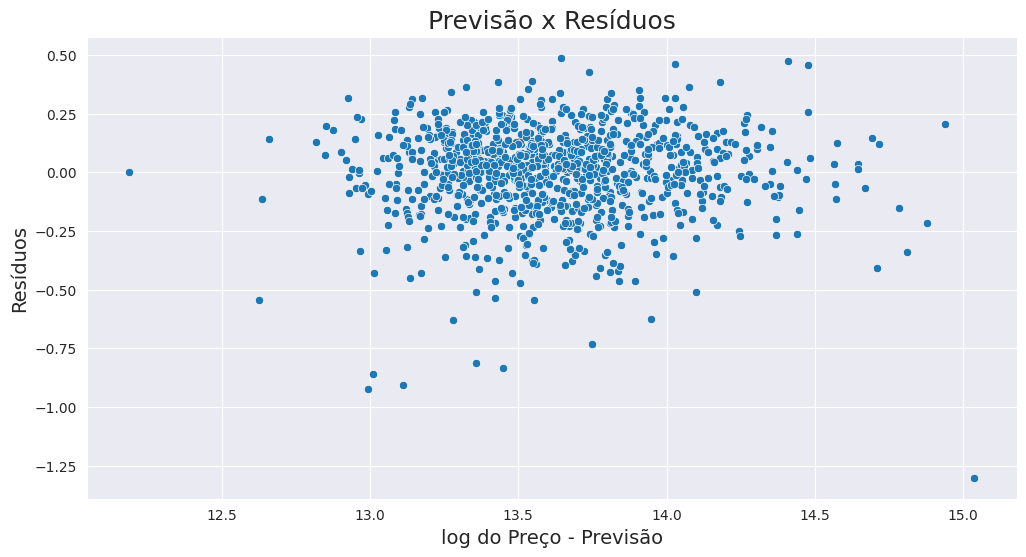

In [63]:
ax = sns.scatterplot(x=y_train_previsto, y = residuo)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()

# este resultado dos dados espalhado dos dados significa um bom resultado, por não ter um padrão nos resíduos.

## **5.4 - Salvando o modelo e prevendo mais casas**

---



Para salvar o nosso modelo vamos utilizar a biblioteca [pickle](https://docs.python.org/3/library/pickle.html) que é serve para serializar e desserializar objetos, permitindo que você salve objetos Python em um arquivo e depois os recupere.

Em outras palavras, ela converte objetos Python em uma representação binária (serialização) para armazenamento ou transmissão e depois reconstrói esses objetos a partir dessa representação (desserialização).

In [65]:
import pickle

In [66]:
arquivo = open('modelo_casas_a_precificar.pkl','wb')
pickle.dump(modelo, arquivo)
arquivo.close()

Vamos agora salvar o arquivo pickle e baixar os arquivos "casas_a_precificar.csv" e "Precificando mais casas.ipynb" que estão nas atividades desse curso.